## 训练集：600519.SH
## 测试集：601318.SH
## 窗口slide：8

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./stockdata/600519.SH.csv')
data.head()

,ts_code,trade_date,close
0,600519.SH,20191231,1158.4663
1,600519.SH,20191230,1161.2082
2,600519.SH,20191227,1138.8811
3,600519.SH,20191226,1111.5597
4,600519.SH,20191225,1110.1887


In [3]:
reverse_price = data.loc[:,'close']
# reverse_price.head()
price = list(reversed(reverse_price))
# price

In [4]:
# 归一化处理
price_norm = price/max(price)
print(price_norm)

[0.12336878 0.12300584 0.12106024 ... 0.94265455 0.96113474 0.95886526]


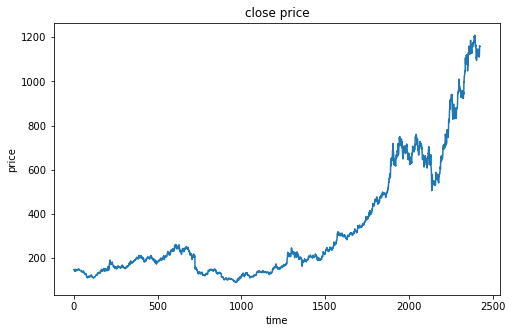

In [5]:
# 数据可视化
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(8,5))
plt.plot(price)
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

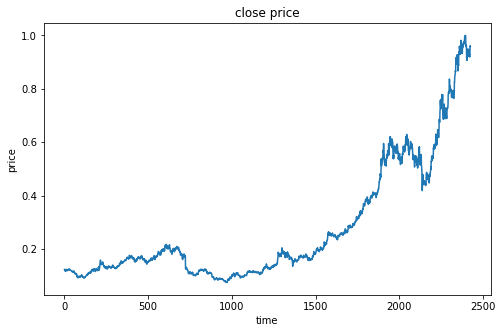

In [6]:
# 归一化后的数据可视化
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(8,5))
plt.plot(price_norm)
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

In [7]:
# define x and y
#define method to extract x and y
def extract_data(data, time_step):
    #time_step序列长度
    x = []
    y = []
    #0,1,2,3,...,9,一共10个样本；
    #time_step=8:0-7第一组，1-8第二组，2-9第三组（两组样本）
    for i in range(len(data)-time_step):
        #10个样本里遍历，再将样本读取出来，放进x里面
        #range为样本组数
        x.append([a for a in data[i:i+time_step]])
        #对于y的值，直接把data中对应的值给y即可
        y.append(data[i+time_step])
    x = np.array(x)
    x = x.reshape(x.shape[0],x.shape[1],1)
    #feature的维度是1
    return x, y
#定义提取数据序列方法

In [8]:
#每8个数据预测一个数据
time_step = 8
# 提取数据 define x and y
x, y = extract_data(price_norm, time_step)
print(x.shape,'\n',x[0,:,:])
# print(y)

(2417, 8, 1) 
 [[0.12336878]
 [0.12300584]
 [0.12106024]
 [0.11885334]
 [0.11760475]
 [0.11708926]
 [0.12025447]
 [0.11719818]]


In [9]:
#打印x和y的维度
print(x.shape, '\n',len(y))

(2417, 8, 1) 
 2417


In [10]:
#set up the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
model = Sequential()
#add RNN layer
model.add(SimpleRNN(units=5,input_shape=(time_step,1),activation='relu'))
#units=5说明单层RNN输出5个神经元
#add output layer
model.add(Dense(units=1,activation='linear'))
#configure the model
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 5)                 35        
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [11]:
#train the model
y_np = np.array(y)
# 这里将y转换成numpy数组(原本是list格式)，就不会报错了
model.fit(x,y_np,batch_size=30,epochs=500)

Train on 2417 samples
Epoch 1/500
2417/2417 [==============================] - 2s 668us/sample - loss: 0.0178
Epoch 2/500
2417/2417 [==============================] - 0s 173us/sample - loss: 0.0017
Epoch 3/500
2417/2417 [==============================] - 0s 174us/sample - loss: 1.5267e-04
Epoch 4/500
2417/2417 [==============================] - 0s 173us/sample - loss: 1.0448e-04
Epoch 5/500
2417/2417 [==============================] - 0s 169us/sample - loss: 8.8211e-05
Epoch 6/500
2417/2417 [==============================] - 0s 172us/sample - loss: 8.1470e-05
Epoch 7/500
2417/2417 [==============================] - 0s 171us/sample - loss: 7.6706e-05
Epoch 8/500
2417/2417 [==============================] - 0s 171us/sample - loss: 7.5054e-05
Epoch 9/500
2417/2417 [==============================] - 0s 171us/sample - loss: 7.2643e-05
Epoch 10/500
2417/2417 [==============================] - 0s 172us/sample - loss: 7.0769e-05
Epoch 11/500
2417/2417 [==============================] - 0s 171u

2417/2417 [==============================] - 0s 172us/sample - loss: 5.3140e-05
Epoch 168/500
2417/2417 [==============================] - 0s 167us/sample - loss: 5.6246e-05
Epoch 169/500
2417/2417 [==============================] - 0s 173us/sample - loss: 5.5281e-05
Epoch 170/500
2417/2417 [==============================] - 0s 170us/sample - loss: 5.5220e-05
Epoch 171/500
2417/2417 [==============================] - 0s 171us/sample - loss: 5.3678e-05
Epoch 172/500
2417/2417 [==============================] - 0s 168us/sample - loss: 5.4732e-05
Epoch 173/500
2417/2417 [==============================] - 0s 169us/sample - loss: 5.5763e-05
Epoch 174/500
2417/2417 [==============================] - 0s 170us/sample - loss: 5.3277e-05
Epoch 175/500
2417/2417 [==============================] - 0s 170us/sample - loss: 5.4269e-05
Epoch 176/500
2417/2417 [==============================] - 0s 174us/sample - loss: 5.5924e-05
Epoch 177/500
2417/2417 [==============================] - 0s 170us/sample

2417/2417 [==============================] - 0s 171us/sample - loss: 5.1143e-05
Epoch 342/500
2417/2417 [==============================] - 0s 167us/sample - loss: 5.0679e-05
Epoch 343/500
2417/2417 [==============================] - 0s 172us/sample - loss: 5.2222e-05
Epoch 344/500
2417/2417 [==============================] - 0s 169us/sample - loss: 5.4059e-05
Epoch 345/500
2417/2417 [==============================] - 0s 170us/sample - loss: 5.4002e-05
Epoch 346/500
2417/2417 [==============================] - 0s 169us/sample - loss: 5.1929e-05
Epoch 347/500
2417/2417 [==============================] - 0s 170us/sample - loss: 5.1917e-05
Epoch 348/500
2417/2417 [==============================] - 0s 171us/sample - loss: 5.2010e-05
Epoch 349/500
2417/2417 [==============================] - 0s 171us/sample - loss: 5.4420e-05
Epoch 350/500
2417/2417 [==============================] - 0s 170us/sample - loss: 5.1179e-05
Epoch 351/500
2417/2417 [==============================] - 0s 173us/sample

In [12]:
#make prediction based on the training data
y_train_predict = model.predict(x)*max(price)
y_train = [i*max(price) for i in y]
print(y_train_predict,y_train)

[[ 143.32872]
 [ 149.61682]
 [ 150.54198]
 ...
 [1117.0653 ]
 [1140.6719 ]
 [1162.8708 ]] [147.8218, 148.9883, 149.9619, 148.9006, 145.5239, 146.2343, 143.9539, 145.6291, 146.208, 143.8224, 148.4007, 147.8218, 148.1288, 146.0501, 145.5327, 147.8744, 150.1987, 150.1811, 150.0759, 150.7074, 152.06680000000003, 151.8125, 148.2954, 146.2519, 147.278, 147.5675, 146.3308, 145.8046, 145.2432, 145.2958, 144.8398, 144.1995, 143.1207, 143.1119, 143.5417, 142.9716, 142.0156, 139.1914, 139.4019, 140.7789, 138.9371, 139.244, 138.5775, 137.946, 139.5861, 138.4898, 140.0334, 141.8402, 140.3404, 139.244, 140.3842, 133.8676, 133.1747, 133.4291, 132.0082, 130.8066, 129.184, 131.4556, 132.017, 129.3507, 129.7892, 128.1929, 125.8775, 129.8243, 130.2979, 126.14940000000001, 120.0976, 116.6068, 115.8876, 117.747, 113.1687, 112.8266, 114.7123, 111.6952, 114.0282, 117.1243, 117.2295, 116.8085, 118.2908, 118.3609, 113.844, 114.11590000000001, 113.8703, 115.3175, 117.7119, 119.2556, 115.1158, 115.721, 115.6683,

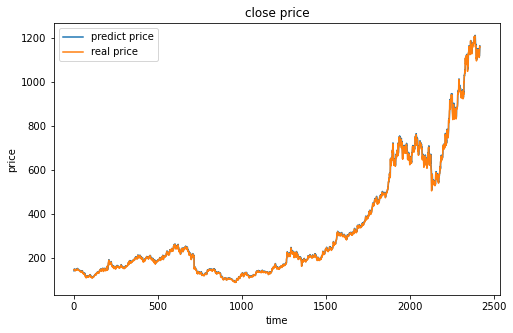

In [13]:
fig2 = plt.figure(figsize=(8,5))
plt.plot(y_train_predict,label='predict price')
plt.plot(y_train,label='real price')

plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [14]:
data_test = pd.read_csv('./stockdata/601318.SH.csv')
# data_test.head()

price_test = list(reversed(data_test.loc[:,'close']))

In [15]:
#normalization
price_test_norm = price_test/max(price_test)
#注意分母一定得是原来的分母，不能弄成price_test
#因为要与原先的模型的归一化效果相同，所以必须统一

#extract x_test and y_test
x_test_norm,y_test_norm = extract_data(price_test_norm,time_step)
print(x_test_norm.shape, len(y_test_norm))

(2369, 8, 1) 2369


In [16]:
#make prediction based on the test data
y_test_predict = model.predict(x_test_norm)*max(price)
y_test = [i*max(price) for i in y_test_norm]
#遍历列表中的数据

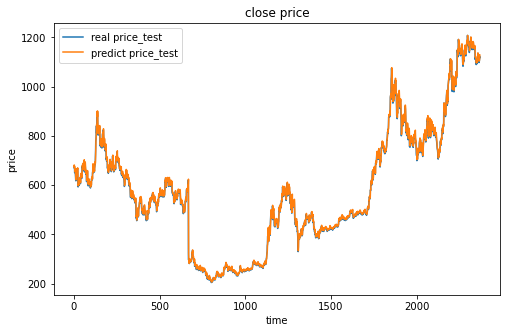

In [17]:
fig3 = plt.figure(figsize=(8,5))
plt.plot(y_test,label='real price_test')
plt.plot(y_test_predict,label='predict price_test')
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

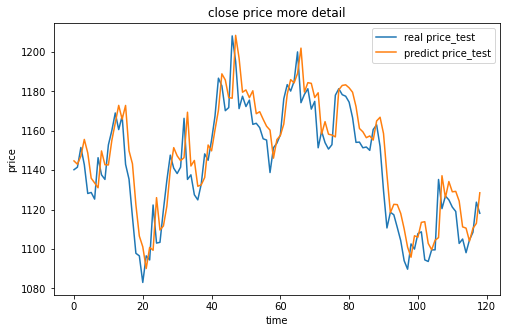

In [18]:
fig4 = plt.figure(figsize=(8,5))
plt.plot(y_test[2250:],label='real price_test')
plt.plot(y_test_predict[2250:],label='predict price_test')
plt.title('close price more detail')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [19]:
#将生成的结果存储起来
#1. 将需要保存的数据转换成数组或pandas的格式
#2. 直接用pandas的方法存储
#变量result_用于存储结果数据
result_y_test = np.array(y_test).reshape(-1,1)
result_y_test_predict = y_test_predict
print(result_y_test.shape,result_y_test_predict.shape)
result = np.concatenate((result_y_test,result_y_test_predict),axis=1)
#合并
print(result.shape)
#转化成dataFrame
result = pd.DataFrame(result,columns=['real_price_test','predict_price_test'])
result.to_csv('RNN600519.SHpredict601318.SH8.csv')

(2369, 1) (2369, 1)
(2369, 2)
